In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import sqrt
from statistics import mode
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import category_encoders as ce
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


In [2]:
fooddf=pd.read_csv("train (1).csv")
centerdf=pd.read_csv("fulfilment_center_info.csv")
mealdf=pd.read_csv("meal_info.csv")

In [3]:
fooddf=pd.merge(fooddf, centerdf, on="center_id", how="left")
fooddf=pd.merge(fooddf, mealdf, on="meal_id", how="left")

In [7]:
fooddf.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [10]:
fooddf

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian
5,1270037,1,55,1248,251.23,252.23,0,0,28,647,56,TYPE_C,2.0,Beverages,Indian
6,1191377,1,55,1778,183.36,184.36,0,0,190,647,56,TYPE_C,2.0,Beverages,Italian
7,1499955,1,55,1062,182.36,183.36,0,0,391,647,56,TYPE_C,2.0,Beverages,Italian
8,1025244,1,55,2707,193.06,192.06,0,0,472,647,56,TYPE_C,2.0,Beverages,Italian
9,1054194,1,55,1207,325.92,384.18,0,1,676,647,56,TYPE_C,2.0,Beverages,Continental


In [12]:
fooddf.center_type.unique()

array(['TYPE_C', 'TYPE_B', 'TYPE_A'], dtype=object)

In [13]:
fooddf.cuisine.unique()

array(['Thai', 'Indian', 'Italian', 'Continental'], dtype=object)

### Cuisine vs Number of Orders

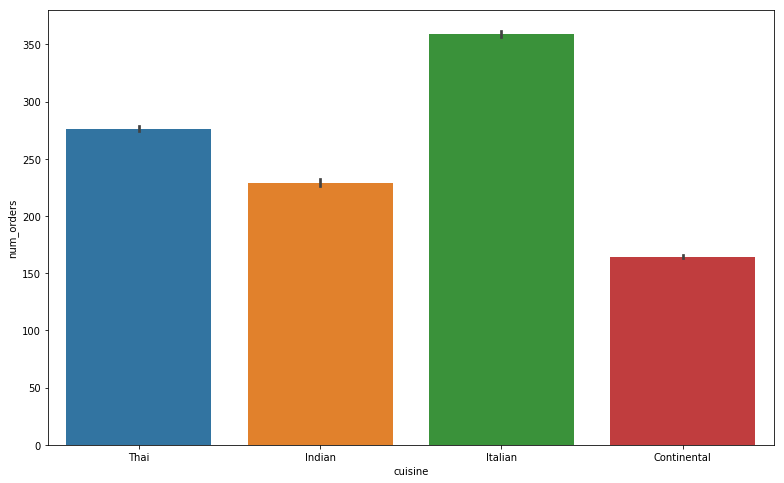

In [14]:
plt.figure(figsize=(13, 8))
sns.barplot(x="cuisine", y="num_orders", data=fooddf)

### Center Type vs Number of Orders

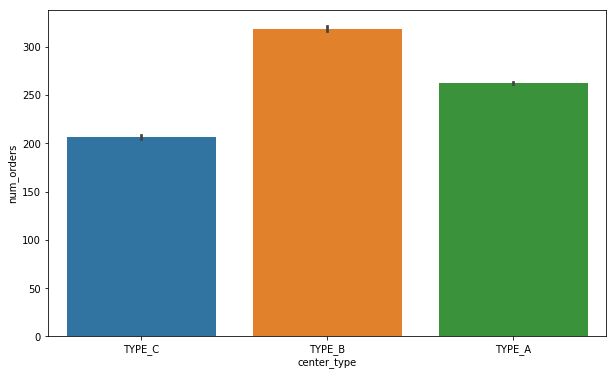

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x="center_type", y="num_orders", data=fooddf)

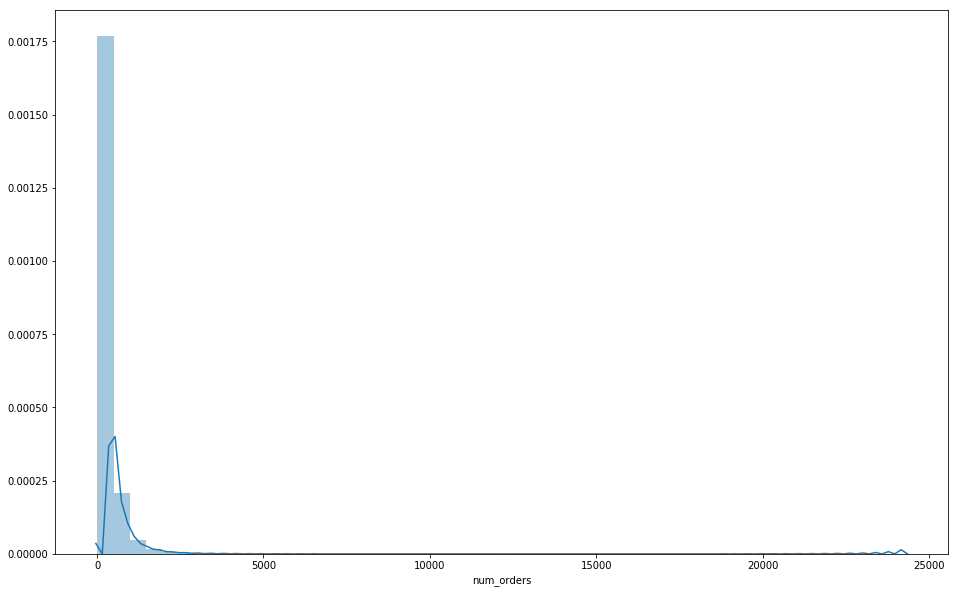

In [16]:
plt.figure(figsize=(16, 10))
sns.distplot(fooddf["num_orders"])

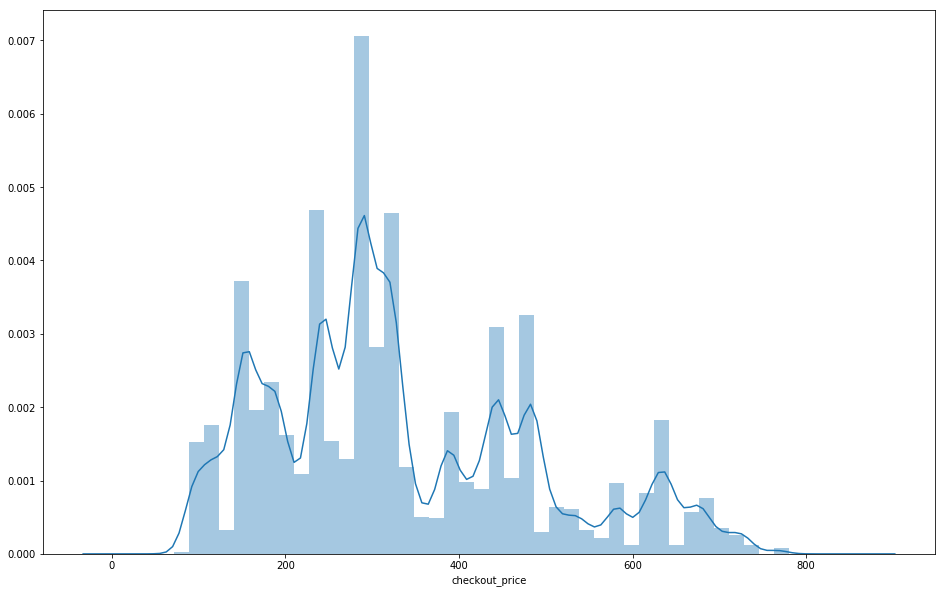

In [17]:
plt.figure(figsize=(16, 10))
sns.distplot(fooddf["checkout_price"])

### Week vs Number of Orders

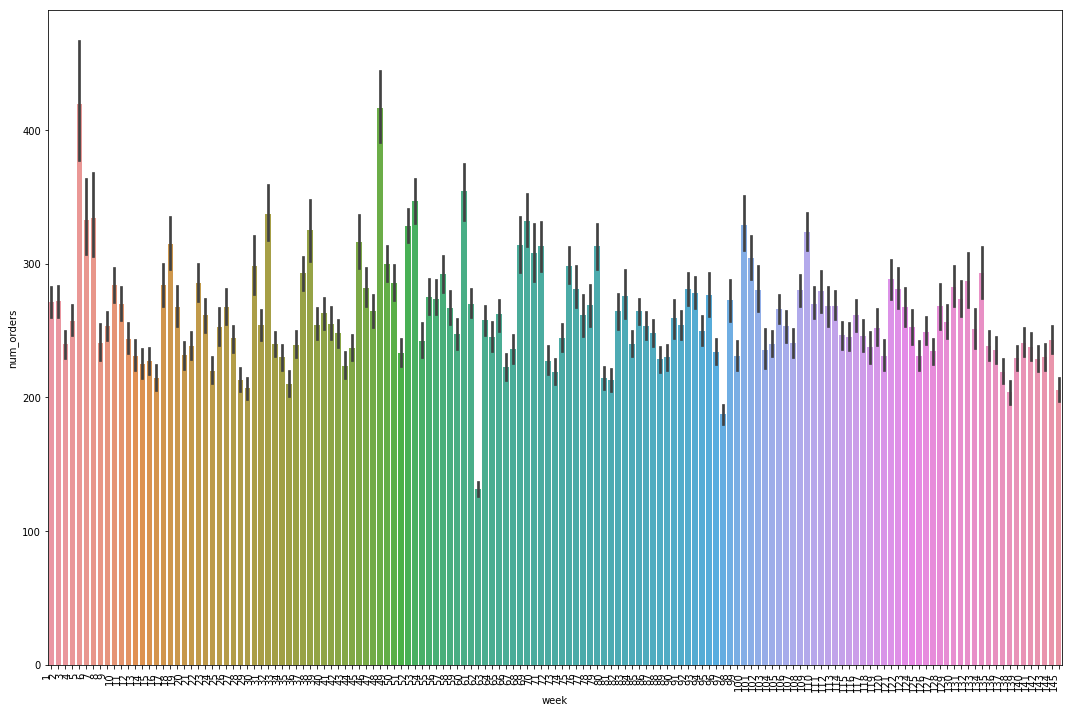

In [22]:
plt.figure(figsize=(15, 10))
ax=sns.barplot(x="week", y="num_orders", data=fooddf)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()

### Price vs Week

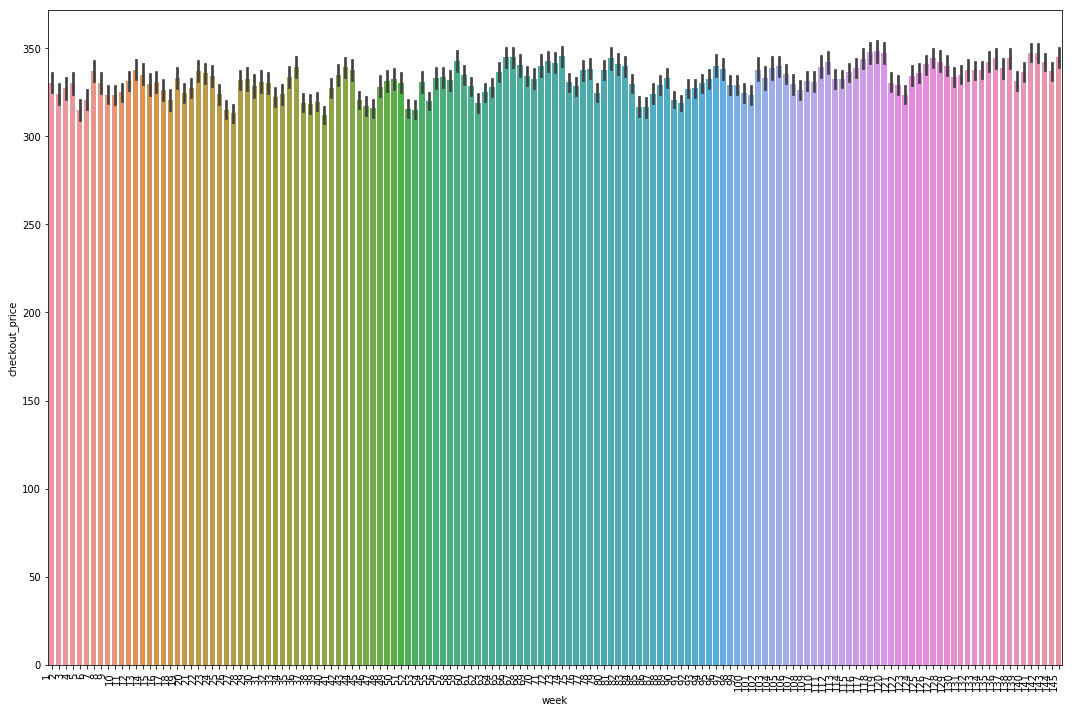

In [23]:
plt.figure(figsize=(15, 10))
ax=sns.barplot(x="week", y="checkout_price", data=fooddf)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()

### Homepage featured vs Number of orders

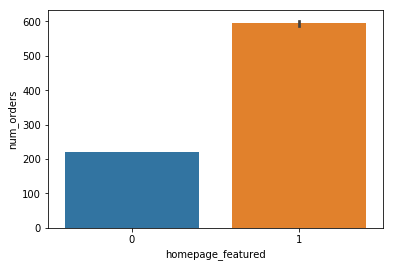

In [143]:
sns.barplot(x="homepage_featured", y="num_orders", data=fooddf)

### emailer for promotion vs number of orders

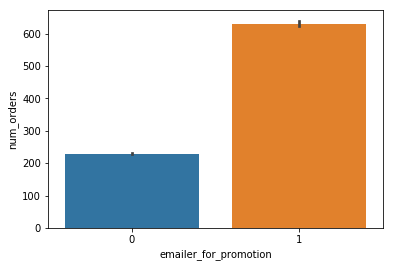

In [144]:
sns.barplot(x="emailer_for_promotion", y="num_orders", data=fooddf)

### Category vs Checkout Price

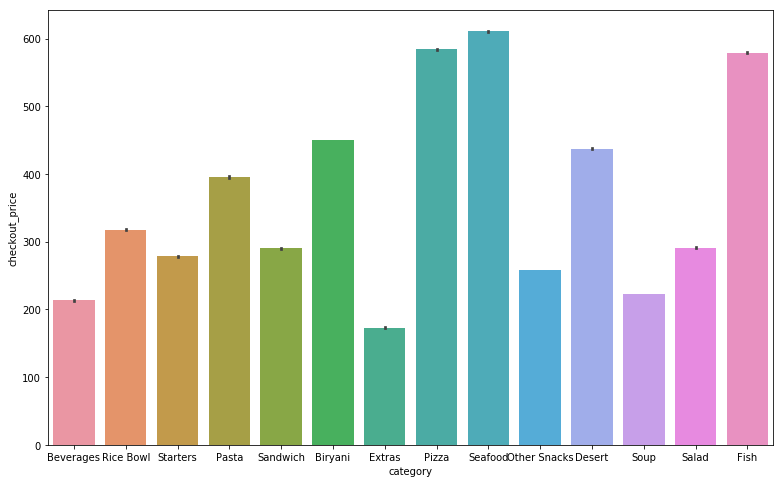

In [27]:
plt.figure(figsize=(13, 8))
sns.barplot(x="category", y="checkout_price", data=fooddf)

### Cuisine vs price

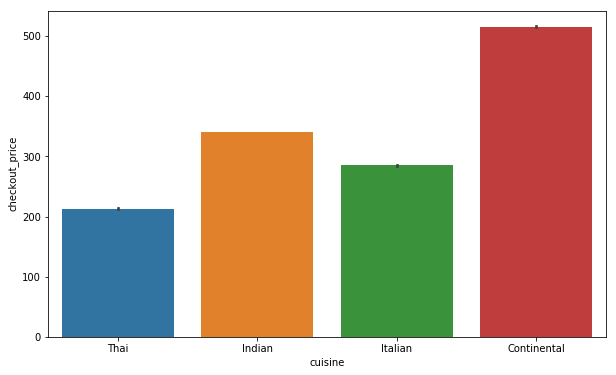

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x="cuisine", y="checkout_price", data=fooddf)

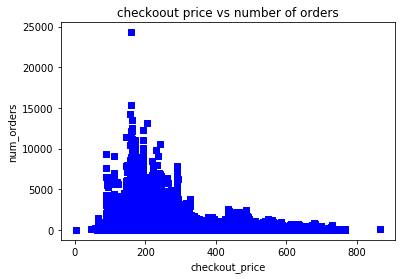

In [8]:
plt.scatter(fooddf.checkout_price, fooddf.num_orders, c = "blue", marker = "s")
plt.title("checkout price vs number of orders")
plt.xlabel("checkout_price")
plt.ylabel("num_orders")
plt.show()

### Splitting

In [4]:
traindf, testdf = train_test_split(
    fooddf.drop(labels=['id'], axis=1),
    test_size=0.2, shuffle=False,
    random_state=0)

traindf.shape, testdf.shape

((365238, 14), (91310, 14))

### Mean num orders vs categories

In [5]:
mean_num_orders_week_map=dict(traindf.groupby(['week']).num_orders.agg(["mean"])["mean"].round(6))
traindf["mean_num_orders_week"]=traindf["week"].map(mean_num_orders_week_map)
testdf["mean_num_orders_week"]=testdf["week"].map(mean_num_orders_week_map)
testdf["mean_num_orders_week"].fillna(np.nanmean(list(mean_num_orders_week_map.values())).round(), inplace=True)

In [6]:
mean_num_orders_cuisine_map=dict(traindf.groupby(['cuisine']).num_orders.agg(["mean"])["mean"].round(6))
traindf["mean_num_orders_cuisine"]=traindf["cuisine"].map(mean_num_orders_cuisine_map)
testdf["mean_num_orders_cuisine"]=testdf["cuisine"].map(mean_num_orders_cuisine_map)

In [7]:
mean_num_orders_city_code_map=dict(traindf.groupby(['city_code']).num_orders.agg(["mean"])["mean"].round(6))
traindf["mean_num_orders_city_code"]=traindf["city_code"].map(mean_num_orders_city_code_map)
testdf["mean_num_orders_city_code"]=testdf["city_code"].map(mean_num_orders_city_code_map)

In [8]:
mean_num_orders_region_code_map=dict(traindf.groupby(['region_code']).num_orders.agg(["mean"])["mean"].round(6))
traindf["mean_num_orders_region_code"]=traindf["region_code"].map(mean_num_orders_region_code_map)
testdf["mean_num_orders_region_code"]=testdf["region_code"].map(mean_num_orders_region_code_map)

In [9]:
mean_num_orders_center_type_map=dict(traindf.groupby(['center_type']).num_orders.agg(["mean"])["mean"].round(6))
traindf["mean_num_orders_center_type"]=traindf["center_type"].map(mean_num_orders_center_type_map)
testdf["mean_num_orders_center_type"]=testdf["center_type"].map(mean_num_orders_center_type_map)

In [10]:
mean_num_orders_category_map=dict(traindf.groupby(['category']).num_orders.agg(["mean"])["mean"].round(6))
traindf["mean_num_orders_category"]=traindf["category"].map(mean_num_orders_category_map)
testdf["mean_num_orders_category"]=testdf["category"].map(mean_num_orders_category_map)

In [11]:
mean_num_orders_op_area_map=dict(traindf.groupby(['op_area']).num_orders.agg(["mean"])["mean"].round(6))
traindf["mean_num_orders_op_area"]=traindf["op_area"].map(mean_num_orders_op_area_map)
testdf["mean_num_orders_op_area"]=testdf["op_area"].map(mean_num_orders_op_area_map)

In [12]:
mean_num_orders_homepage_featured_map=dict(traindf.groupby(['homepage_featured']).num_orders.agg(["mean"])["mean"].round(6))
traindf["mean_num_orders_homepage_featured"]=traindf["homepage_featured"].map(mean_num_orders_homepage_featured_map)
testdf["mean_num_orders_homepage_featured"]=testdf["homepage_featured"].map(mean_num_orders_homepage_featured_map)

In [13]:
mean_num_orders_emailer_for_promotion_map=dict(traindf.groupby(['emailer_for_promotion']).num_orders.agg(["mean"])["mean"].round(6))
traindf["mean_num_orders_emailer_for_promotion"]=traindf["emailer_for_promotion"].map(mean_num_orders_emailer_for_promotion_map)
testdf["mean_num_orders_emailer_for_promotion"]=testdf["emailer_for_promotion"].map(mean_num_orders_emailer_for_promotion_map)

### checkout price vs categories

In [14]:
mean_base_price_cuisine_map=dict(traindf.groupby(['cuisine']).base_price.agg(["mean"])["mean"].round(6))
traindf["mean_base_price_cuisine"]=traindf["cuisine"].map(mean_base_price_cuisine_map)
testdf["mean_base_price_cuisine"]=testdf["cuisine"].map(mean_base_price_cuisine_map)

In [15]:
mean_base_price_category_map=dict(traindf.groupby(['category']).base_price.agg(["mean"])["mean"].round(6))
traindf["mean_base_price_category"]=traindf["category"].map(mean_base_price_category_map)
testdf["mean_base_price_category"]=testdf["category"].map(mean_base_price_category_map)

### Difference disc

In [16]:
traindf["discount"]=traindf["base_price"]-traindf["checkout_price"]
testdf["discount"]=testdf["base_price"]-testdf["checkout_price"]

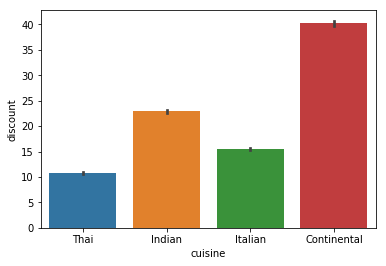

In [56]:
sns.barplot(x="cuisine", y="discount", data=traindf)

In [17]:
mean_discount_category_map=dict(traindf.groupby(['cuisine']).discount.agg(["mean"])["mean"].round(6))
traindf["mean_discount_category"]=traindf["cuisine"].map(mean_discount_category_map)
testdf["mean_discount_category"]=testdf["cuisine"].map(mean_discount_category_map)

### Intentional encode

In [237]:
fooddf.groupby("city_code").num_orders.agg(["mean"]).sort_values(by="mean")

,mean
city_code,
478,126.972117
702,131.277356
658,145.581828
649,153.216715
693,160.611195
541,170.631637
515,175.812979
561,175.968868
632,177.447657


In [59]:
fooddf.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
dtype: object

In [18]:
cuisine_map={'Continental': 16, 'Indian': 22, 'Thai': 27, 'Italian':35 }
center_type_map={'TYPE_C': 20, 'TYPE_A': 26, 'TYPE_B':31}
category_map={'Biryani': 3, 'Pasta': 5, 'Desert': 6, 'Soup':8, 'Fish': 9, 'Seafood': 10, 'Starters': 15,
'Other Snacks': 16,'Pizza': 22,'Extras':29,'Beverages':31,'Salad': 38,
'Sandwich': 52,'Rice Bowl':62}
region_code_map={35: 131, 34: 206, 77:216, 93: 238, 23: 250, 85:286,56: 316, 71: 334}
city_code_map = {478:126, 
                702:131, 
                658:145, 
                649:153, 
                693:160,
                541:170,
                515:176, 561:176,632:176,676:176,  
                553:180, 562:180, 
                593:190, 
                695:192, 683:192, 
                654:197, 
                576:200, 615:200,461:200,
                473:209, 526:209, 
                675: 237, 556: 237, 609:237, 
                517:245,680:245,
                698:252,522:252,
                485:256,620:256,
                599:264, 699:264,
                659:270, 604:270, 648:270,
                647:276, 614: 276,
                456:290, 651:290, 577:290, 703:290,
                628:307, 602:307,
                579:330, 638:330,596:330, 713:330,
                590:362,
                700:409, 679:409,
                685:447}

In [235]:
traindf['Month'] = traindf['week'].apply(lambda x: int(x / 4))
traindf['Year'] = traindf['week'].apply(lambda x: int(x / 52))
traindf['Quarter'] = traindf['week'].apply(lambda x: int(x / 13))

In [236]:
testdf['Month'] = testdf['week'].apply(lambda x: int(x / 4))
testdf['Year'] = testdf['week'].apply(lambda x: int(x / 52))
testdf['Quarter'] = testdf['week'].apply(lambda x: int(x / 13))

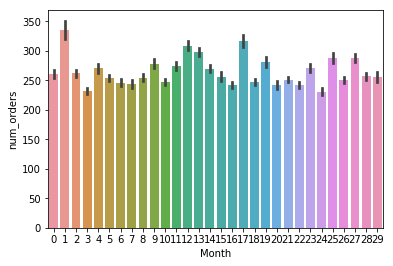

In [139]:
sns.barplot(x="Month", y="num_orders", data=traindf)

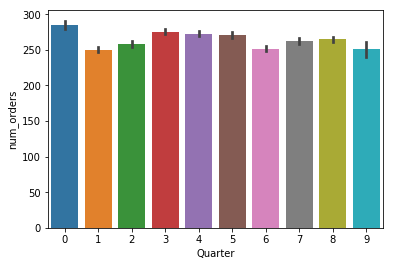

In [246]:
sns.barplot(x="Quarter", y="num_orders", data=traindf)

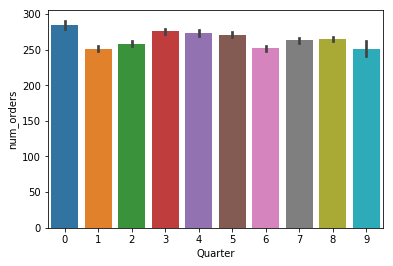

In [247]:
sns.barplot(x="Quarter", y="num_orders", data=traindf)

In [263]:
i=0
for col in traindf.columns:
    print(i, col)
    i=i+1

0 week
1 center_id
2 meal_id
3 checkout_price
4 base_price
5 emailer_for_promotion
6 homepage_featured
7 num_orders
8 city_code
9 region_code
10 center_type
11 op_area
12 category
13 cuisine
14 mean_num_orders_week
15 mean_num_orders_cuisine
16 mean_num_orders_city_code
17 mean_num_orders_region_code
18 mean_num_orders_center_type
19 mean_num_orders_category
20 mean_num_orders_op_area
21 mean_num_orders_homepage_featured
22 mean_num_orders_emailer_for_promotion
23 mean_base_price_cuisine
24 mean_base_price_category
25 discount
26 mean_discount_category


### One Hot Encoding

In [21]:
x_train=traindf.copy(deep=True)
x_train.drop(labels=["num_orders"], inplace=True, axis=1)
y_train=traindf.iloc[:,7]
x_train["category"]=x_train["category"].map(category_map)
#x_train["cuisine"]=x_train["cuisine"].map(cuisine_map)
#x_train["center_type"]=x_train["center_type"].map(center_type_map)
#x_train["region_code"]=x_train["region_code"].map(region_code_map)
x_train["city_code"]=x_train["city_code"].map(city_code_map)


encoder = ce.OneHotEncoder(cols=['city_code', 'category', 'cuisine', 'center_type', 'region_code'])
encoder.fit(x_train, y_train)
x_train = encoder.transform(x_train)

In [20]:
x_train=traindf.copy(deep=True)
x_train.drop(labels=["num_orders"], inplace=True, axis=1)
y_train=traindf.iloc[:,7]
x_train["category"]=x_train["category"].map(category_map)
x_train["cuisine"]=x_train["cuisine"].map(cuisine_map)
x_train["center_type"]=x_train["center_type"].map(center_type_map)
x_train["region_code"]=x_train["region_code"].map(region_code_map)
x_train["city_code"]=x_train["city_code"].map(city_code_map)
#encoder = ce.OneHotEncoder(cols=['city_code', 'category', 'cuisine', 'center_type', 'region_code'])
#encoder.fit(x_train, y_train)
#x_train = encoder.transform(x_train)

In [22]:
x_train.shape

(365238, 76)

In [23]:
x_test=testdf.copy(deep=True)
x_test.drop(labels=["num_orders"], inplace=True, axis=1)
y_test=testdf.iloc[:,7] 
x_test["category"]=x_test["category"].map(category_map)
#x_test["cuisine"]=x_test["cuisine"].map(cuisine_map)
#x_test["center_type"]=x_test["center_type"].map(center_type_map)
#x_test["region_code"]=x_test["region_code"].map(region_code_map)
x_test["city_code"]=x_test["city_code"].map(city_code_map)


encoder = ce.OneHotEncoder(cols=['city_code', 'category', 'cuisine', 'center_type', 'region_code'])
encoder.fit(x_test)
x_test = encoder.transform(x_test)

In [27]:
gsc = GridSearchCV(estimator=RandomForestRegressor(),
                  param_grid={
                      'n_estimators' : [100, 150, 50], #range(10,100),
                      'max_depth' : [3, 6],
                      'min_samples_split': [4,6],
                      
                  },
                  scoring='neg_mean_squared_error')

In [28]:
gsc.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 150, 50], 'max_depth': [3, 6], 'min_samples_split': [4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [29]:
gsc.best_params_

{'max_depth': 6, 'min_samples_split': 6, 'n_estimators': 100}

In [243]:
x_test.shape

(91310, 29)

In [157]:
i=0
for col in testdf.columns:
    print(i, col)
    i=i+1

0 week
1 center_id
2 meal_id
3 checkout_price
4 base_price
5 emailer_for_promotion
6 homepage_featured
7 num_orders
8 city_code
9 region_code
10 center_type
11 op_area
12 category
13 cuisine
14 mean_num_orders_week
15 mean_num_orders_cuisine
16 mean_num_orders_city_code
17 mean_num_orders_region_code
18 mean_num_orders_center_type
19 mean_num_orders_category
20 mean_num_orders_op_area
21 mean_base_price_cuisine
22 mean_base_price_category
23 discount
24 mean_discount_category
25 Month
26 Year
27 Quarter
28 mean_num_orders_homepage_featured
29 mean_num_orders_emailer_for_promotion


In [86]:
scale= StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Random Forest Regressor

In [158]:
rf=RandomForestRegressor()

In [269]:
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [270]:
y_pred_rf = rf.predict(x_test)
print ('Root Mean-squared error on test', sqrt(mean_squared_error(y_pred_rf, y_test)))
print ('Root Mean-squared logarithmic error on test', rmsle(y_test, y_pred_rf))

Root Mean-squared error on test 223.61863710866564
Root Mean-squared logarithmic error on test 0.7453777428695216


In [190]:
y_pred_rf = rf.predict(x_test)
print ('Root Mean-squared error on test', sqrt(mean_squared_error(y_pred_rf, y_test)))
print ('Root Mean-squared logarithmic error on test', rmsle(y_test, y_pred_rf))

Root Mean-squared error on test 196.11791515579424
Root Mean-squared logarithmic error on test 0.6781323244537735


In [82]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',  ascending=False)

In [219]:
feature_importances

,importance
category,0.154380
checkout_price,0.126243
homepage_featured,0.122502
mean_num_orders_week,0.105333
mean_num_orders_op_area,0.089256
mean_num_orders_category,0.078797
base_price,0.074573
mean_num_orders_city_code,0.047585
emailer_for_promotion,0.046198
mean_base_price_cuisine,0.024935


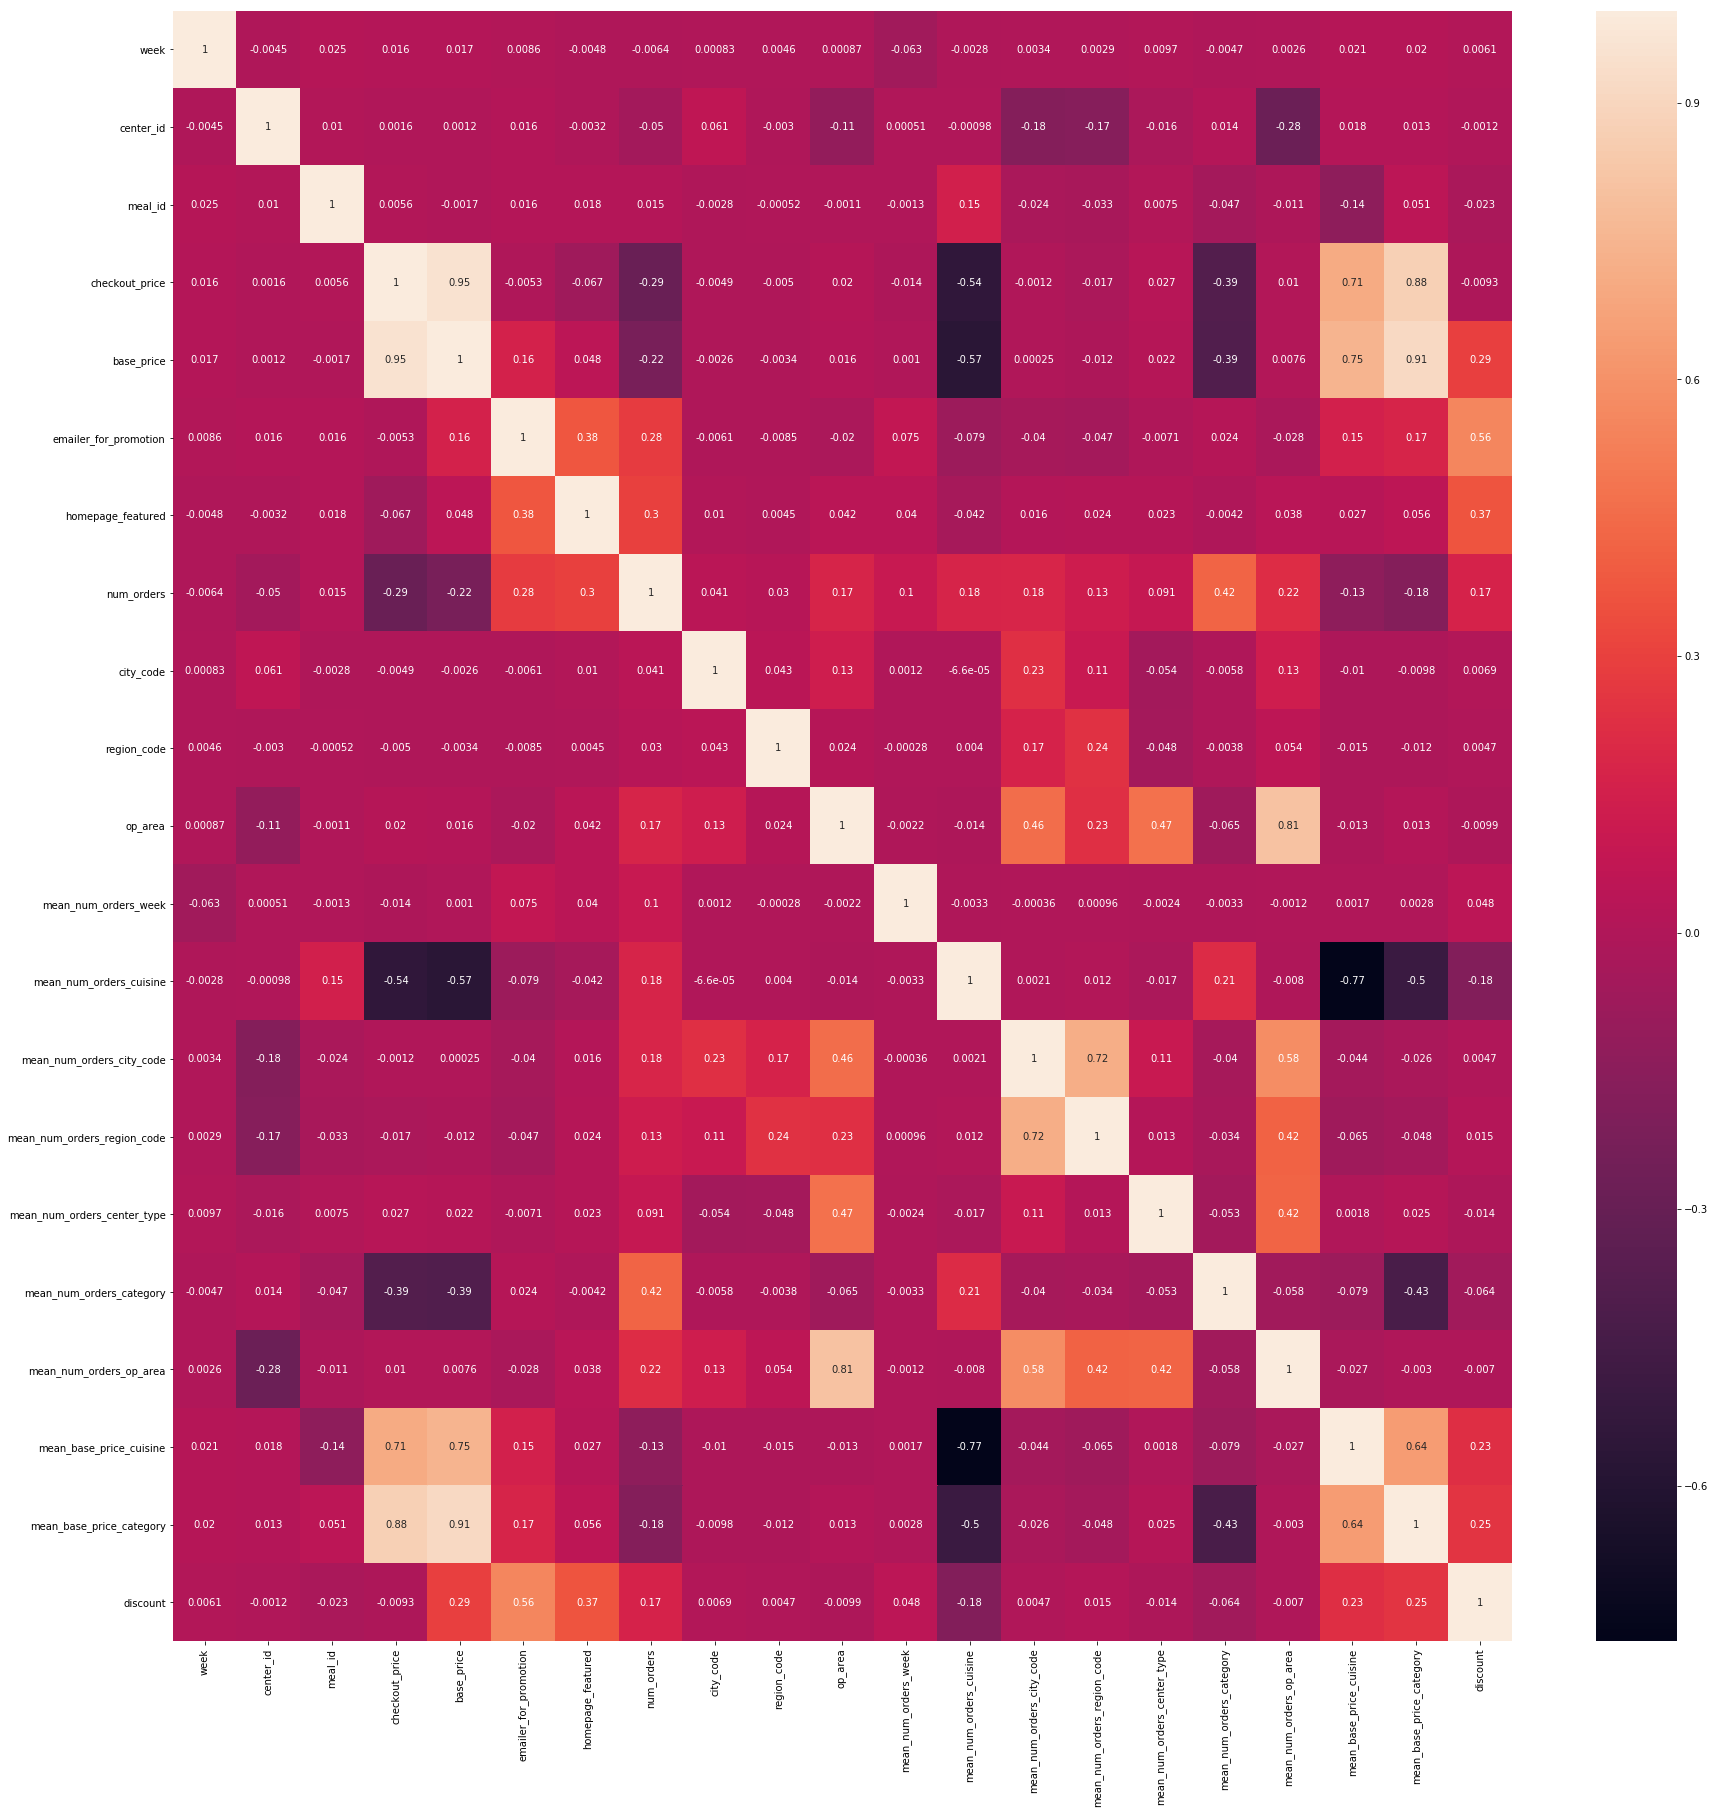

In [51]:
corrmat = traindf.corr()
fig, ax = plt.subplots()
fig.set_size_inches(30,30)
sns.heatmap(corrmat, annot=True)

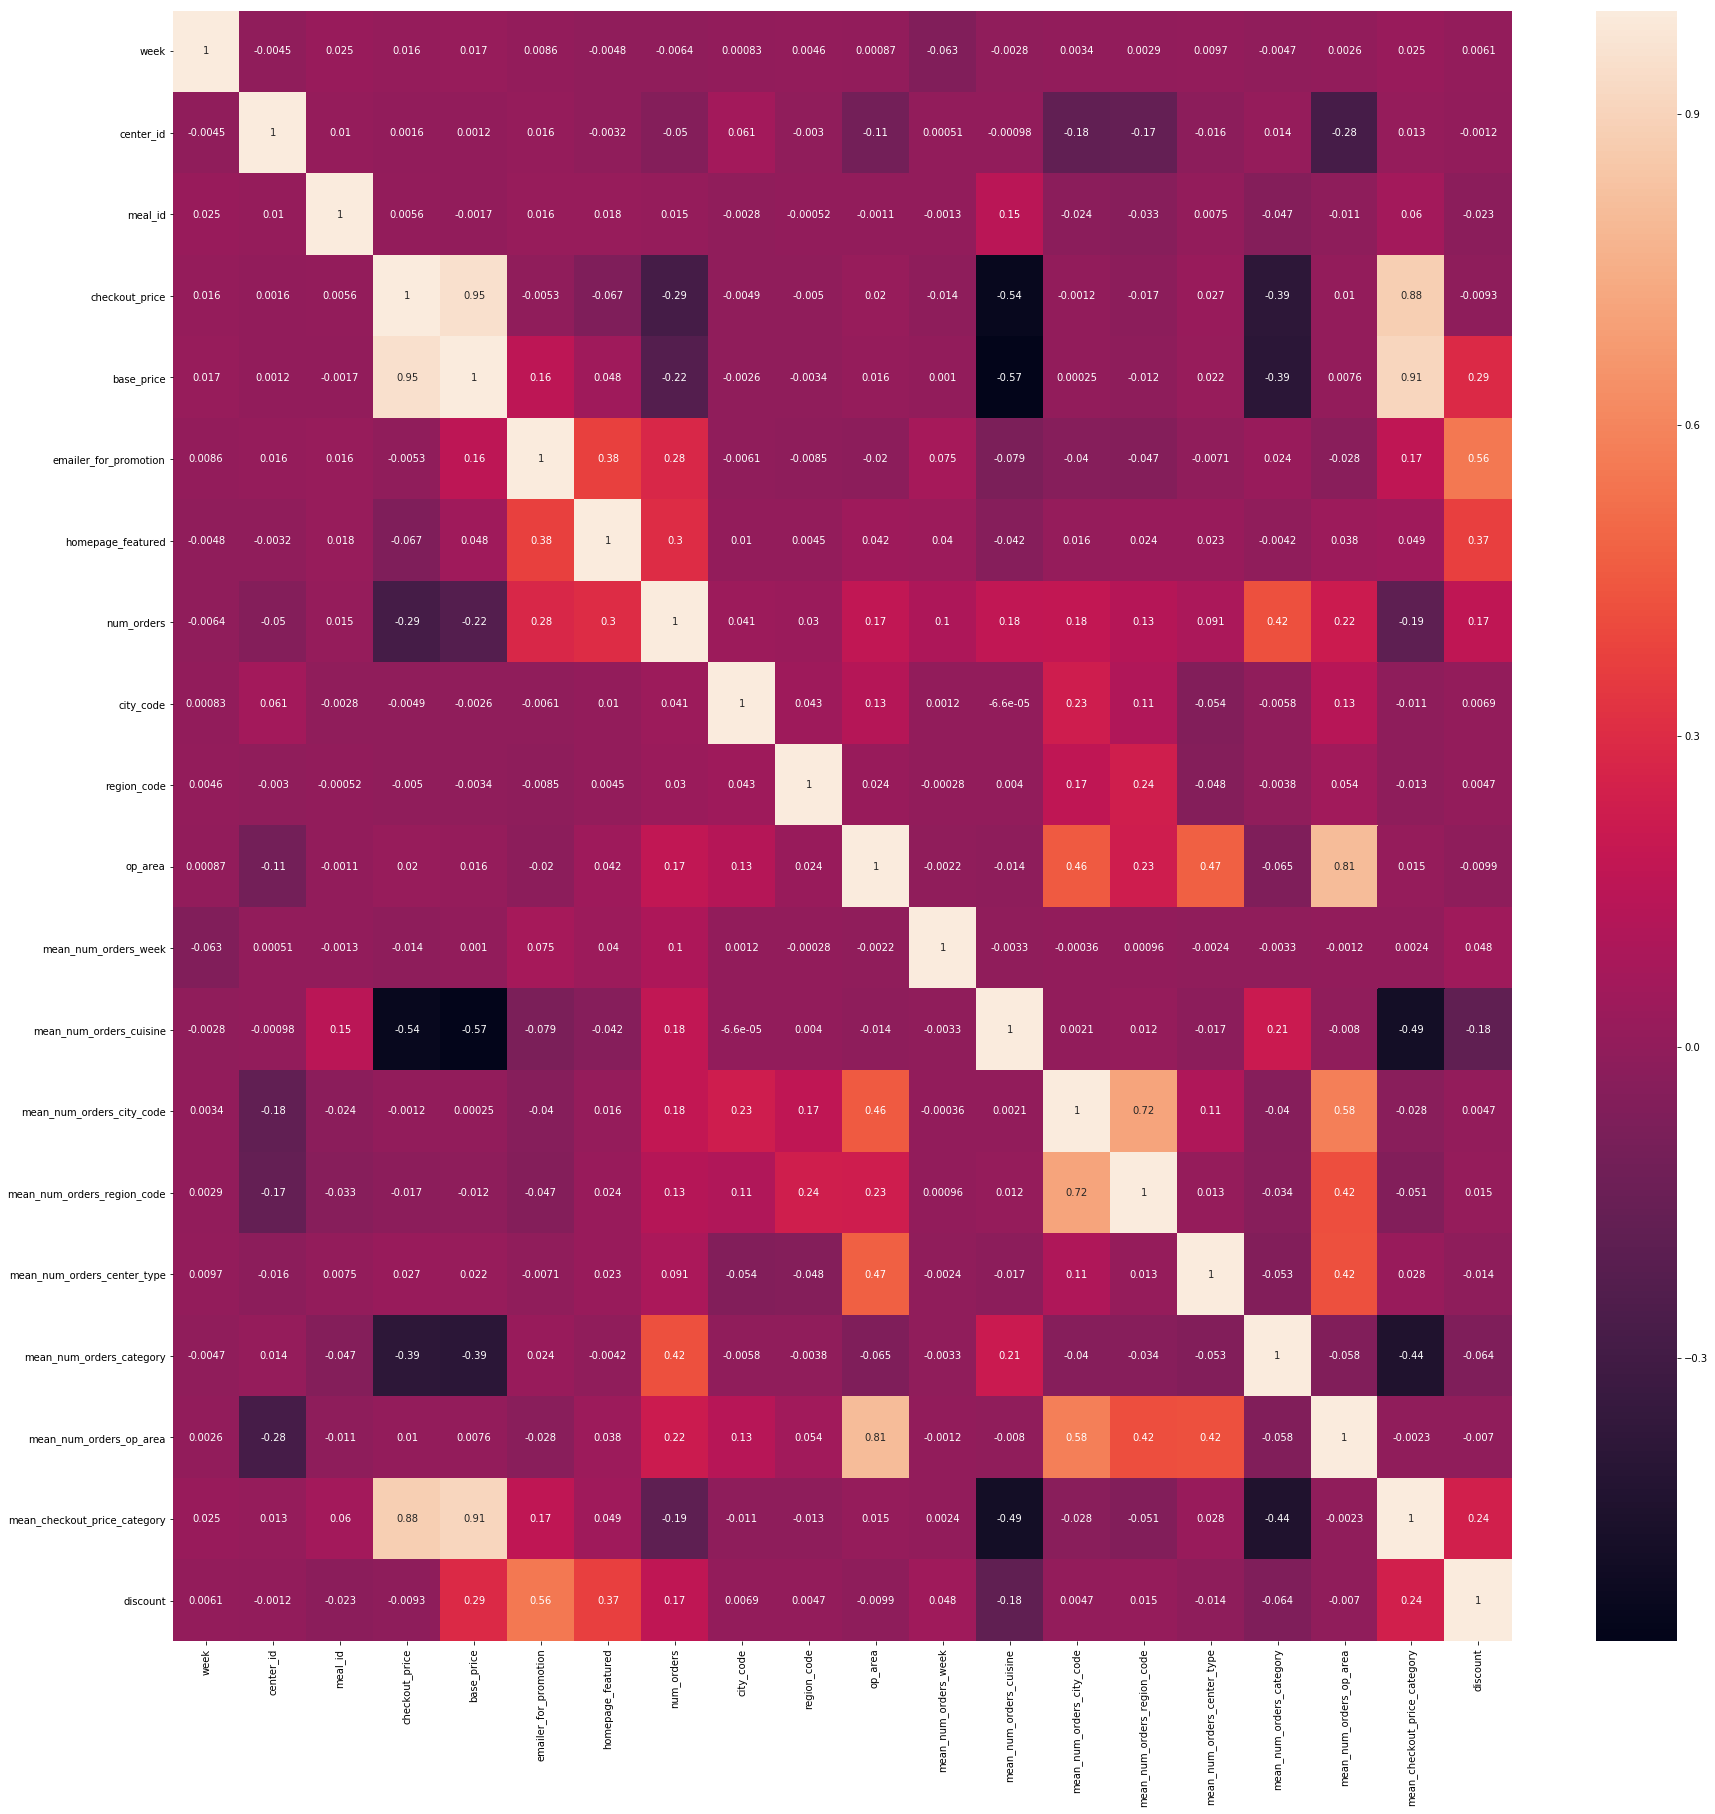

In [30]:
corrmat = traindf.corr()
fig, ax = plt.subplots()
fig.set_size_inches(30,30)
sns.heatmap(corrmat, annot=True)

### Gradient boost

In [271]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor()
gbm.fit(x_train, y_train)


In [273]:
y_pred_gbm = gbm.predict(x_test)
print ('Root Mean-squared error on test', sqrt(mean_squared_error(y_pred_gbm, y_test)))
print ('Root Mean-squared logarithmic error on test', rmsle(y_test, y_pred_gbm))

Root Mean-squared error on test 239.74341613998527
Root Mean-squared logarithmic error on test 0.8169857641832134


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


### XBG

In [ ]:
xgb = XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.1,
                 max_depth=5,
                 min_child_weight=1.5,
                 n_estimators=100,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [ ]:
xgb.fit(x_train, y_train)

In [ ]:
print ('Root Mean-squared error on test', sqrt(mean_squared_error(y_pred_knn, y_test)))
print ('Root Mean-squared logarithmic error on test', rmsle(y_test, y_pred_knn))

### KNN

In [ ]:
#knn=KNeighborsRegressor(n_neighbors=8)
#knn.fit(x_train,y_train)
#y_pred_knn=knn.predict(x_test)

In [78]:
print ('Root Mean-squared error on test', sqrt(mean_squared_error(y_pred_knn, y_test)))
print ('Root Mean-squared logarithmic error on test', rmsle(y_test, y_pred_knn))

Root Mean-squared error on test 231.30387282391632
Root Mean-squared logarithmic error on test 0.6989775274233917


In [55]:
#print ('Root Mean-squared error on test', sqrt(mean_squared_log_error(y_pred, y_train)))

In [28]:
def rmsle(y, y0):
    return np.sqrt(np.mean(np.abs((np.log1p(y)-np.log1p(y0)))))

In [64]:
print ('Root Mean-squared logarithmic error on test', rmsle(y_train, y_pred))

Root Mean-squared logarithmic error on test 0.8569030772775531


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


### Linear Regression

In [33]:
regr = LinearRegression()
regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)
print ('Root Mean-squared error on test', sqrt(mean_squared_error(y_pred, y_test)))
print ('Root Mean-squared logarithmic error on test', rmsle(y_test, y_pred))

Root Mean-squared error on test 51785938048.9497
Root Mean-squared logarithmic error on test 4.352517227657726


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


### Support Vector Regression

In [ ]:
from sklearn.svm import SVR
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(x_train, y_train) 

In [ ]:
y_pred_svr = clf.predict(x_test)
print ('Root Mean-squared error on test', sqrt(mean_squared_error(y_pred_svr, y_test)))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)

In [205]:
i=0
for col in x_train.columns:
    print(i, col)
    i=i+1

0 week
1 center_id
2 meal_id
3 checkout_price
4 base_price
5 emailer_for_promotion
6 homepage_featured
7 city_code_1
8 city_code_2
9 city_code_3
10 city_code_4
11 city_code_5
12 city_code_6
13 city_code_7
14 city_code_8
15 city_code_9
16 city_code_10
17 city_code_11
18 city_code_12
19 city_code_13
20 city_code_14
21 city_code_15
22 city_code_16
23 city_code_17
24 city_code_18
25 city_code_19
26 city_code_20
27 city_code_21
28 city_code_22
29 city_code_23
30 city_code_24
31 city_code_25
32 city_code_26
33 city_code_27
34 city_code_28
35 city_code_29
36 city_code_30
37 city_code_31
38 city_code_32
39 city_code_33
40 city_code_34
41 city_code_35
42 city_code_36
43 city_code_37
44 city_code_38
45 city_code_39
46 city_code_40
47 city_code_41
48 city_code_42
49 city_code_43
50 city_code_44
51 city_code_45
52 city_code_46
53 city_code_47
54 city_code_48
55 city_code_49
56 city_code_50
57 city_code_51
58 region_code
59 center_type
60 op_area
61 category
62 cuisine
63 mean_num_orders_week
64 me

In [206]:
i=0
for col in x_hack.columns:
    print(i, col)
    i=i+1

0 id
1 week
2 center_id
3 meal_id
4 checkout_price
5 base_price
6 emailer_for_promotion
7 homepage_featured
8 mean_num_orders_week
9 city_code_1
10 city_code_2
11 city_code_3
12 city_code_4
13 city_code_5
14 city_code_6
15 city_code_7
16 city_code_8
17 city_code_9
18 city_code_10
19 city_code_11
20 city_code_12
21 city_code_13
22 city_code_14
23 city_code_15
24 city_code_16
25 city_code_17
26 city_code_18
27 city_code_19
28 city_code_20
29 city_code_21
30 city_code_22
31 city_code_23
32 city_code_24
33 city_code_25
34 city_code_26
35 city_code_27
36 city_code_28
37 city_code_29
38 city_code_30
39 city_code_31
40 city_code_32
41 city_code_33
42 city_code_34
43 city_code_35
44 city_code_36
45 city_code_37
46 city_code_38
47 city_code_39
48 city_code_40
49 city_code_41
50 city_code_42
51 city_code_43
52 city_code_44
53 city_code_45
54 city_code_46
55 city_code_47
56 city_code_48
57 city_code_49
58 city_code_50
59 city_code_51
60 region_code
61 center_type
62 op_area
63 category
64 cuisine

In [192]:
hackdf=pd.read_csv("test_QoiMO9B.csv")

In [193]:
hackdf["mean_num_orders_week"]=np.nan
hackdf["mean_num_orders_week"].fillna((np.nanmean(list(mean_num_orders_week_map.values())).round()), inplace=True)

In [203]:
hackdf.

(91310, 79)

In [194]:
hackdf=pd.merge(hackdf, centerdf, on="center_id", how="left")
hackdf=pd.merge(hackdf, mealdf, on="meal_id", how="left")

In [195]:
hackdf["mean_num_orders_cuisine"]=hackdf["cuisine"].map(mean_num_orders_cuisine_map)
hackdf["mean_num_orders_city_code"]=hackdf["city_code"].map(mean_num_orders_city_code_map)
hackdf["mean_num_orders_region_code"]=hackdf["region_code"].map(mean_num_orders_region_code_map)
hackdf["mean_num_orders_center_type"]=hackdf["center_type"].map(mean_num_orders_center_type_map)
hackdf["mean_num_orders_category"]=hackdf["category"].map(mean_num_orders_category_map)
hackdf["mean_num_orders_op_area"]=hackdf["op_area"].map(mean_num_orders_op_area_map)
hackdf["mean_num_orders_homepage_featured"]=hackdf["homepage_featured"].map(mean_num_orders_homepage_featured_map)
hackdf["mean_num_orders_emailer_for_promotion"]=hackdf["emailer_for_promotion"].map(mean_num_orders_emailer_for_promotion_map)
hackdf["mean_base_price_cuisine"]=hackdf["cuisine"].map(mean_base_price_cuisine_map)
hackdf["mean_base_price_category"]=hackdf["category"].map(mean_base_price_category_map)

In [196]:
hackdf["discount"]=hackdf["base_price"]-hackdf["checkout_price"]

In [197]:
hackdf["mean_discount_category"]=hackdf["category"].map(mean_base_price_category_map)

In [198]:
hackdf['Month'] = hackdf['week'].apply(lambda x: int(x / 4))
hackdf['Year'] = hackdf['week'].apply(lambda x: int(x / 52))
hackdf['Quarter'] = hackdf['week'].apply(lambda x: int(x / 13))

In [120]:
hackdf

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,mean_num_orders_week,city_code,...,mean_num_orders_cuisine,mean_num_orders_city_code,mean_num_orders_region_code,mean_num_orders_center_type,mean_num_orders_category,mean_num_orders_op_area,mean_base_price_cuisine,mean_base_price_category,discount,mean_discount_category
0,1028232,146,55,1885,158.11,159.11,0,0,265.0,647,...,283.962927,281.387158,318.758971,209.098440,322.036110,162.082439,222.066082,226.388515,1.00,226.388515
1,1127204,146,55,1993,160.11,159.11,0,0,265.0,647,...,283.962927,281.387158,318.758971,209.098440,322.036110,162.082439,222.066082,226.388515,-1.00,226.388515
2,1212707,146,55,2539,157.14,159.14,0,0,265.0,647,...,283.962927,281.387158,318.758971,209.098440,322.036110,162.082439,222.066082,226.388515,2.00,226.388515
3,1082698,146,55,2631,162.02,162.02,0,0,265.0,647,...,229.417338,281.387158,318.758971,209.098440,322.036110,162.082439,364.804024,226.388515,0.00,226.388515
4,1400926,146,55,1248,163.93,163.93,0,0,265.0,647,...,229.417338,281.387158,318.758971,209.098440,322.036110,162.082439,364.804024,226.388515,0.00,226.388515
5,1284113,146,55,1778,190.15,190.15,0,0,265.0,647,...,361.081692,281.387158,318.758971,209.098440,322.036110,162.082439,299.436150,226.388515,0.00,226.388515
6,1197966,146,55,1062,191.09,192.09,0,0,265.0,647,...,361.081692,281.387158,318.758971,209.098440,322.036110,162.082439,299.436150,226.388515,1.00,226.388515
7,1132739,146,55,2707,242.56,240.56,0,0,265.0,647,...,361.081692,281.387158,318.758971,209.098440,322.036110,162.082439,299.436150,226.388515,-2.00,226.388515
8,1057981,146,55,1207,360.90,360.90,0,0,265.0,647,...,167.590993,281.387158,318.758971,209.098440,322.036110,162.082439,553.785496,226.388515,0.00,226.388515
9,1095932,146,55,1230,383.18,384.18,0,0,265.0,647,...,167.590993,281.387158,318.758971,209.098440,322.036110,162.082439,553.785496,226.388515,1.00,226.388515


In [208]:
x_hack=hackdf.copy(deep=True)
x_hack.drop(labels="id", inplace=True, axis=1)
x_hack["category"]=x_hack["category"].map(category_map)
x_hack["cuisine"]=x_hack["cuisine"].map(cuisine_map)
x_hack["center_type"]=x_hack["center_type"].map(center_type_map)
x_hack["region_code"]=x_hack["region_code"].map(region_code_map)

encoder = ce.OneHotEncoder(cols=['city_code'])
encoder.fit(x_hack)
x_hack = encoder.transform(x_hack)

In [209]:
x_hack.shape

(32573, 79)

In [202]:
x_train.shape

(365238, 79)

In [210]:
actual_pred=rf.predict(x_hack)

In [211]:
pred1 = pd.DataFrame({'id': hackdf['id'], 'num_orders': actual_pred})
pred1.to_csv('rf-2.csv', header=True, index=False)